In [1]:
# import necessary library
import pandas as pd
import math
import numpy as np
from datetime import datetime
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Task 1: Identify urbana and rural within each county
# Task 2: Calculate Population for rural and urban within the county
# Task 3: Report Corresponding Caltrans District for each county

In [34]:
# Read urban shape file
urban=gpd.read_file('C:/UC Berkeley Project Backup/AT Census/Statewide_Stratification/stanford-urban.json')
urban1=urban.to_crs(epsg=7131)
urban1.head()

,id,uace10,name10,uatyp10,intptlat10,intptlon10,geometry
0,jt346pj7452.1,02683,"Antioch, CA",U,+37.9916865,-121.7821203,"MULTIPOLYGON (((117481.117 48274.001, 117483.4..."
1,jt346pj7452.2,02926,"Arcata-McKinleyville, CA",C,+40.9146046,-124.0893244,"MULTIPOLYGON (((-86316.683 375318.449, -86322...."
2,jt346pj7452.3,03196,"Arroyo Grande--Grover Beach, CA",U,+35.1194083,-120.6075309,"MULTIPOLYGON (((221075.540 -270353.271, 221101..."
3,jt346pj7452.4,03250,"Arvin, CA",C,+35.2030117,-118.8325552,"MULTIPOLYGON (((380048.336 -255877.094, 375946..."
4,jt346pj7452.5,04130,"Auburn--North Auburn, CA",C,+38.9299469,-121.0816692,"MULTIPOLYGON (((171081.671 159232.280, 171122...."


In [35]:
# read the Caltrans district county file
county=gpd.read_file('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/CA_Counties/CA_Counties/CA_Counties_TIGER2016.shp')
county1=county.to_crs(epsg=7131)
county1.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((201919.409 241296.733, 201924.515 24..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((157712.695 131795.769, 157822.536 13..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((220396.198 -379582.182, 220344..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((207036.432 91177.957, 207065.999 913..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((310179.159 -469188.833, 310178..."


In [36]:
# Now identify rural vs urban are
# get the urban area first
urban_area_within_county=gpd.clip(county1,urban1)
urban_area_within_county['Area_Type']='Urban'
urban_area_within_county['Area_in_sqm']=urban_area_within_county['geometry'].area*3.86102e-7
urban_area_within_county.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Area_Type,Area_in_sqm
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10895149811,826195031,+33.0236041,-116.7761174,"MULTIPOLYGON (((499837.403 -449483.147, 499851...",Urban,1066.665354
48,06,025,00277277,06025,Imperial,Imperial County,06,H1,G4020,None,20940,None,A,10817291640,790230304,+33.0408143,-115.3554001,"MULTIPOLYGON (((703713.349 -518305.792, 703211...",Urban,46.878359
47,06,059,00277294,06059,Orange,Orange County,06,H1,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,"MULTIPOLYGON (((449779.619 -412153.593, 449856...",Urban,667.087027
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,"MULTIPOLYGON (((393539.430 -367039.170, 393549...",Urban,1691.178344
31,06,065,00277297,06065,Riverside,Riverside County,06,H1,G4020,348,40140,None,A,18664206749,250926952,+33.7298275,-116.0022389,"MULTIPOLYGON (((490202.504 -396227.273, 490198...",Urban,986.308536


<AxesSubplot:>

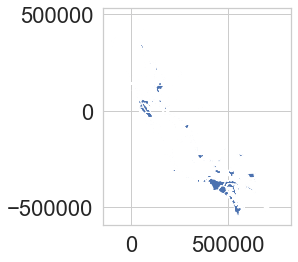

In [162]:
urban_area_within_county.plot()

In [37]:
# Now get the rural area
# # Now get the rural areas
rural_area_within_county = county1.overlay(urban1, how='difference')
rural_area_within_county['Area_Type']='Rural'
rural_area_within_county['Area_in_sqm']=rural_area_within_county['geometry'].area*3.86102e-7
rural_area_within_county.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Area_Type,Area_in_sqm
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((201919.409 241296.733, 201924.515 24...",Rural,962.847695
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"MULTIPOLYGON (((146359.192 82094.754, 146371.0...",Rural,584.749376
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((358887.823 -439994.694, 359387...",Rural,3604.616914
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((207065.999 91306.591, 207062.249 914...",Rural,1025.702049
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((368227.423 -364277.644, 368163...",Rural,1887.506336


<AxesSubplot:>

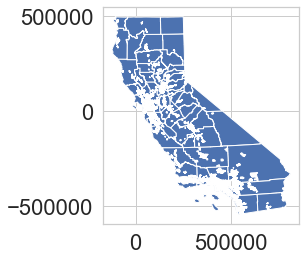

In [163]:
rural_area_within_county.plot()

In [38]:
rural_area_within_county['NAMELSAD'].nunique(),urban_area_within_county['NAMELSAD'].nunique()

(58, 52)

In [ ]:
# It seems rural are exists in all 58 counties and urban are exists in 52 counties

In [39]:
# Lets check the San francisco county rural area
sf_rural=rural_area_within_county.loc[rural_area_within_county['NAMELSAD']=='San Francisco County']
sf_rural.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Area_Type,Area_in_sqm
10,06,075,00277302,06075,San Francisco,San Francisco County,06,H6,G4020,488,41860,41884,C,121455687,479136515,+37.7272391,-123.0322294,"MULTIPOLYGON (((33709.149 31252.374, 36147.955...",Rural,130.98208


In [55]:
# Coombine rural and urban shape file together
county_rural_urban=pd.concat([urban_area_within_county,rural_area_within_county])
county_rural_urban.shape

(110, 20)

In [180]:
county_rural_urban.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Area_Type,Area_in_sqm
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10895149811,826195031,+33.0236041,-116.7761174,"MULTIPOLYGON (((499837.403 -449483.147, 499851...",Urban,1066.665354
48,06,025,00277277,06025,Imperial,Imperial County,06,H1,G4020,None,20940,None,A,10817291640,790230304,+33.0408143,-115.3554001,"MULTIPOLYGON (((703713.349 -518305.792, 703211...",Urban,46.878359
47,06,059,00277294,06059,Orange,Orange County,06,H1,G4020,348,31080,11244,A,2047702298,407606601,+33.6756872,-117.7772068,"MULTIPOLYGON (((449779.619 -412153.593, 449856...",Urban,667.087027
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,"MULTIPOLYGON (((393539.430 -367039.170, 393549...",Urban,1691.178344
31,06,065,00277297,06065,Riverside,Riverside County,06,H1,G4020,348,40140,None,A,18664206749,250926952,+33.7298275,-116.0022389,"MULTIPOLYGON (((490202.504 -396227.273, 490198...",Urban,986.308536


<AxesSubplot:>

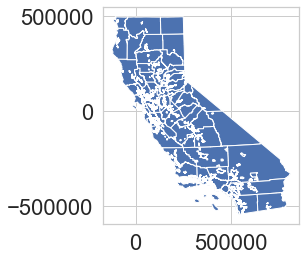

In [167]:
county_rural_urban.plot()

In [164]:
county_rural_urban.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [41]:
# Now lets read the population file and calculate the population for each area
bg=gpd.read_file('C:/UC Berkeley Project Backup/AT Census/Statewide_Stratification/Socio-demographic data/CA_BG/CA_blck_grp_2022.shp')
pop=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Statewide_Stratification/Socio-demographic data/pop_CA/pop.csv')
pop.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,PCI,PUMAA,GEO_ID,BTTRA,BTBGA,TL_GEO_ID,NAME_E,AQNFE001,NAME_M,AQNFM001
0,G06000104001001,2018-2022,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,1500000US060014001001,NaN,NaN,60014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",1975,"Block Group 1, Census Tract 4001, Alameda Coun...",464
1,G06000104001002,2018-2022,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,1500000US060014001002,NaN,NaN,60014001002,"Block Group 2, Census Tract 4001, Alameda Coun...",1294,"Block Group 2, Census Tract 4001, Alameda Coun...",222
2,G06000104002001,2018-2022,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,1500000US060014002001,NaN,NaN,60014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",948,"Block Group 1, Census Tract 4002, Alameda Coun...",178
3,G06000104002002,2018-2022,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,1500000US060014002002,NaN,NaN,60014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",1199,"Block Group 2, Census Tract 4002, Alameda Coun...",190
4,G06000104003001,2018-2022,CA,NaN,NaN,California,6,Alameda County,1,NaN,...,NaN,NaN,1500000US060014003001,NaN,NaN,60014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",1300,"Block Group 1, Census Tract 4003, Alameda Coun...",374


In [42]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg_proj = bg2.to_crs(epsg=7131)
bg_proj.head(5)

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,ORIG_FID,geometry
0,G06000104001001,06,001,400100,1,060014001001,Block Group 1,G5030,S,5739048.0,0.0,+37.8698744,-122.2336204,11305.214542,5.739044e+06,3100,"POLYGON ((68432.666 37162.181, 68389.939 37147..."
1,G06000104001002,06,001,400100,2,060014001002,Block Group 2,G5030,S,1206808.0,0.0,+37.8571075,-122.2236121,8258.256215,1.206807e+06,20186,"POLYGON ((68432.666 37162.181, 68338.756 37100..."
2,G06000104002001,06,001,400200,1,060014002001,Block Group 1,G5030,S,288070.0,0.0,+37.8497451,-122.2488478,2971.010308,2.880696e+05,2902,"POLYGON ((66313.536 35331.642, 66313.912 35321..."
3,G06000104002002,06,001,400200,2,060014002002,Block Group 2,G5030,S,298490.0,0.0,+37.8465865,-122.2503095,3162.343955,2.984887e+05,9507,"POLYGON ((66155.776 34954.352, 65998.562 34843..."
4,G06000104003001,06,001,400300,1,060014003001,Block Group 1,G5030,S,265695.0,0.0,+37.8439848,-122.2486668,2553.074982,2.656948e+05,4546,"POLYGON ((66008.573 34652.677, 65948.380 34527..."


In [111]:
bg_proj.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
bg_proj["Total block Area"]=bg_proj.area*3.861e-7 # in mile
bg_proj.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,ORIG_FID,geometry,Total block Area
0,G06000104001001,06,001,400100,1,060014001001,Block Group 1,G5030,S,5739048.0,0.0,+37.8698744,-122.2336204,11305.214542,5.739044e+06,3100,"POLYGON ((68432.666 37162.181, 68389.939 37147...",2.215896
1,G06000104001002,06,001,400100,2,060014001002,Block Group 2,G5030,S,1206808.0,0.0,+37.8571075,-122.2236121,8258.256215,1.206807e+06,20186,"POLYGON ((68432.666 37162.181, 68338.756 37100...",0.465959
2,G06000104002001,06,001,400200,1,060014002001,Block Group 1,G5030,S,288070.0,0.0,+37.8497451,-122.2488478,2971.010308,2.880696e+05,2902,"POLYGON ((66313.536 35331.642, 66313.912 35321...",0.111226
3,G06000104002002,06,001,400200,2,060014002002,Block Group 2,G5030,S,298490.0,0.0,+37.8465865,-122.2503095,3162.343955,2.984887e+05,9507,"POLYGON ((66155.776 34954.352, 65998.562 34843...",0.115249
4,G06000104003001,06,001,400300,1,060014003001,Block Group 1,G5030,S,265695.0,0.0,+37.8439848,-122.2486668,2553.074982,2.656948e+05,4546,"POLYGON ((66008.573 34652.677, 65948.380 34527...",0.102587


In [47]:
bg_pop=pd.merge(bg_proj, pop, left_on='GISJOIN', right_on='GISJOIN', how='left')
bg_pop1=bg_pop.rename(columns={'AQNFE001':'Total_pop'})
bg_pop1.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,PCI,PUMAA,GEO_ID,BTTRA,BTBGA,TL_GEO_ID,NAME_E,Total_pop,NAME_M,AQNFM001
0,G06000104001001,06,001,400100,1,060014001001,Block Group 1,G5030,S,5739048.0,...,NaN,NaN,1500000US060014001001,NaN,NaN,60014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",1975,"Block Group 1, Census Tract 4001, Alameda Coun...",464
1,G06000104001002,06,001,400100,2,060014001002,Block Group 2,G5030,S,1206808.0,...,NaN,NaN,1500000US060014001002,NaN,NaN,60014001002,"Block Group 2, Census Tract 4001, Alameda Coun...",1294,"Block Group 2, Census Tract 4001, Alameda Coun...",222
2,G06000104002001,06,001,400200,1,060014002001,Block Group 1,G5030,S,288070.0,...,NaN,NaN,1500000US060014002001,NaN,NaN,60014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",948,"Block Group 1, Census Tract 4002, Alameda Coun...",178
3,G06000104002002,06,001,400200,2,060014002002,Block Group 2,G5030,S,298490.0,...,NaN,NaN,1500000US060014002002,NaN,NaN,60014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",1199,"Block Group 2, Census Tract 4002, Alameda Coun...",190
4,G06000104003001,06,001,400300,1,060014003001,Block Group 1,G5030,S,265695.0,...,NaN,NaN,1500000US060014003001,NaN,NaN,60014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",1300,"Block Group 1, Census Tract 4003, Alameda Coun...",374


In [165]:
# now do the spatial join with pop and rural, urban file together
pop_rural_urban=gpd.overlay(county_rural_urban, bg_pop1, how='intersection', make_valid=True, keep_geom_type=False)
pop_rural_urban.head()

,STATEFP_1,COUNTYFP_1,COUNTYNS,GEOID_1,NAME,NAMELSAD_1,LSAD,CLASSFP,MTFCC_1,CSAFP,...,PUMAA,GEO_ID,BTTRA,BTBGA,TL_GEO_ID,NAME_E,Total_pop,NAME_M,AQNFM001,geometry
0,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,...,NaN,1500000US060590320631,NaN,NaN,60590320631,"Block Group 1, Census Tract 320.63, Orange Cou...",2451,"Block Group 1, Census Tract 320.63, Orange Cou...",799,"POLYGON ((501131.265 -442025.098, 501134.821 -..."
1,06,059,00277294,06059,Orange,Orange County,06,H1,G4020,348,...,NaN,1500000US060590320631,NaN,NaN,60590320631,"Block Group 1, Census Tract 320.63, Orange Cou...",2451,"Block Group 1, Census Tract 320.63, Orange Cou...",799,"POLYGON ((501675.538 -441737.837, 501685.029 -..."
2,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,...,NaN,1500000US060590320631,NaN,NaN,60590320631,"Block Group 1, Census Tract 320.63, Orange Cou...",2451,"Block Group 1, Census Tract 320.63, Orange Cou...",799,"POLYGON ((501543.591 -442062.488, 501581.074 -..."
3,06,059,00277294,06059,Orange,Orange County,06,H1,G4020,348,...,NaN,1500000US060590320631,NaN,NaN,60590320631,"Block Group 1, Census Tract 320.63, Orange Cou...",2451,"Block Group 1, Census Tract 320.63, Orange Cou...",799,"POLYGON ((501612.990 -442067.907, 501602.039 -..."
4,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,...,NaN,1500000US060590320643,NaN,NaN,60590320643,"Block Group 3, Census Tract 320.64, Orange Cou...",1058,"Block Group 3, Census Tract 320.64, Orange Cou...",415,"MULTIPOLYGON (((507554.012 -439882.581, 507554..."


<AxesSubplot:>

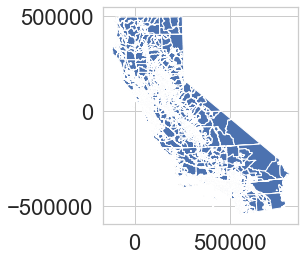

In [166]:
pop_rural_urban.plot()

In [112]:
county_rural_urban.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [105]:
pop_rural_urban.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [168]:
pop_rural_urban.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'COUNTYNS', 'GEOID_1', 'NAME', 'NAMELSAD_1',
       'LSAD', 'CLASSFP', 'MTFCC_1', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT_1', 'ALAND_1', 'AWATER_1', 'INTPTLAT_1', 'INTPTLON_1',
       'Area_Type', 'Area_in_sqm', 'GISJOIN', 'STATEFP_2', 'COUNTYFP_2',
       'TRACTCE', 'BLKGRPCE', 'GEOID_2', 'NAMELSAD_2', 'MTFCC_2', 'FUNCSTAT_2',
       'ALAND_2', 'AWATER_2', 'INTPTLAT_2', 'INTPTLON_2', 'Shape_Leng',
       'Shape_Area', 'ORIG_FID', 'Total block Area', 'YEAR', 'STUSAB',
       'REGIONA', 'DIVISIONA', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA',
       'COUSUBA', 'PLACEA', 'TRACTA', 'BLKGRPA', 'CONCITA', 'AIANHHA',
       'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITSA', 'ANRCA', 'CBSAA', 'CSAA',
       'METDIVA', 'NECTAA', 'CNECTAA', 'NECTADIVA', 'UAA', 'CDCURRA', 'SLDUA',
       'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA', 'SDSECA', 'SDUNIA', 'PCI',
       'PUMAA', 'GEO_ID', 'BTTRA', 'BTBGA', 'TL_GEO_ID', 'NAME_E', 'Total_pop',
       'NAME_M', 'AQNFM001', 'geom

In [181]:
# Now calculate the total population 
pop_rural_urban1=pd.DataFrame({'Rural_urban_population':pop_rural_urban.groupby(['NAMELSAD_1','COUNTYNS','Area_Type', 'Area_in_sqm'])['Total_pop'].sum()}).reset_index()
pop_rural_urban1=pop_rural_urban1.rename(columns={'NAMELSAD_1':'County'})
pop_rural_urban1.head(10)

,County,COUNTYNS,Area_Type,Area_in_sqm,Rural_urban_population
0,Alameda County,01675839,Rural,404.899316,137397
1,Alameda County,01675839,Urban,416.489893,1703873
2,Alpine County,01675840,Rural,744.161996,7423
3,Amador County,01675841,Rural,596.049899,66730
4,Amador County,01675841,Urban,10.285940,21824
5,Butte County,01675842,Rural,1493.395995,97965
6,Butte County,01675842,Urban,183.990278,204660
7,Calaveras County,01675885,Rural,1025.702049,67298
8,Calaveras County,01675885,Urban,11.950541,16631
9,Colusa County,01675902,Rural,1151.868174,29932


In [182]:
# Calculate the percentage of rural urban population
pct_pop=pd.DataFrame({'total_county_pop':pop_rural_urban1.groupby(['County'])['Rural_urban_population'].sum()}).reset_index()
# Now join with above file
pct_pop1=pd.merge(pop_rural_urban1,pct_pop, on=['County'], how='inner')
pct_pop1['Pct_pop']=pct_pop1['Rural_urban_population']/pct_pop1['total_county_pop']*100
pct_pop1.head()

,County,COUNTYNS,Area_Type,Area_in_sqm,Rural_urban_population,total_county_pop,Pct_pop
0,Alameda County,01675839,Rural,404.899316,137397,1841270,7.462078
1,Alameda County,01675839,Urban,416.489893,1703873,1841270,92.537922
2,Alpine County,01675840,Rural,744.161996,7423,7423,100.000000
3,Amador County,01675841,Rural,596.049899,66730,88554,75.355151
4,Amador County,01675841,Urban,10.285940,21824,88554,24.644849


In [178]:
pct_pop1.shape

(110, 7)

In [184]:
county_rural_urban.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'Area_Type',
       'Area_in_sqm'],
      dtype='object')

In [188]:
# Get teh geometry back
pop_rural_urban_geo=county_rural_urban.drop(['LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON',],axis=1)
pop_rural_urban_geo1=pop_rural_urban_geo.rename(columns={'NAMELSAD':'County'})
pop_rural_urban_geo1.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,geometry,Area_Type,Area_in_sqm
8,06,073,00277301,06073,San Diego,San Diego County,"MULTIPOLYGON (((499837.403 -449483.147, 499851...",Urban,1066.665354
48,06,025,00277277,06025,Imperial,Imperial County,"MULTIPOLYGON (((703713.349 -518305.792, 703211...",Urban,46.878359
47,06,059,00277294,06059,Orange,Orange County,"MULTIPOLYGON (((449779.619 -412153.593, 449856...",Urban,667.087027
5,06,037,00277283,06037,Los Angeles,Los Angeles County,"MULTIPOLYGON (((393539.430 -367039.170, 393549...",Urban,1691.178344
31,06,065,00277297,06065,Riverside,Riverside County,"MULTIPOLYGON (((490202.504 -396227.273, 490198...",Urban,986.308536


<AxesSubplot:>

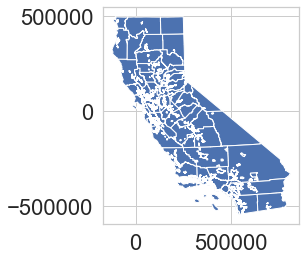

In [189]:
pop_rural_urban_geo1.plot()

In [190]:
pop_rural_urban_geo1.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [191]:
# now join the geometry
pop_ru_ur=pd.merge(pop_rural_urban_geo1,pct_pop1, on=['County', 'COUNTYNS', 'Area_Type', 'Area_in_sqm'], how='inner')
#pop_ru_ur1 = gpd.GeoDataFrame(pop_ru_ur, geometry)
pop_ru_ur.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,geometry,Area_Type,Area_in_sqm,Rural_urban_population,total_county_pop,Pct_pop
0,06,073,00277301,06073,San Diego,San Diego County,"MULTIPOLYGON (((499837.403 -449483.147, 499851...",Urban,1066.665354,3251376,3657336,88.900117
1,06,025,00277277,06025,Imperial,Imperial County,"MULTIPOLYGON (((703713.349 -518305.792, 703211...",Urban,46.878359,154889,252953,61.232324
2,06,059,00277294,06059,Orange,Orange County,"MULTIPOLYGON (((449779.619 -412153.593, 449856...",Urban,667.087027,3276213,3364456,97.377199
3,06,037,00277283,06037,Los Angeles,Los Angeles County,"MULTIPOLYGON (((393539.430 -367039.170, 393549...",Urban,1691.178344,10020621,10311133,97.182540
4,06,065,00277297,06065,Riverside,Riverside County,"MULTIPOLYGON (((490202.504 -396227.273, 490198...",Urban,986.308536,2470370,2879762,85.783825


<AxesSubplot:>

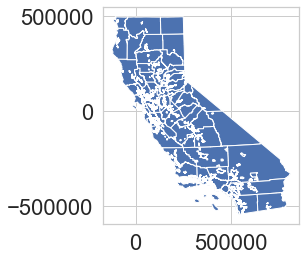

In [192]:
pop_ru_ur.plot()

In [193]:
pop_ru_ur.shape

(110, 12)

In [194]:
pop_ru_ur.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [195]:
pop_ru_ur.shape

(110, 12)

In [196]:
# Now read caltrans district shape file
dist=gpd.read_file('C:/UC Berkeley Project Backup/AT Census/Code_For Hasim/Caltrans_Districts.geojson',Driver='Geojson')
dist1=dist.to_crs(epsg=7131)
dist1=dist1.drop(['OBJECTID','Shape_Length','Shape_Area'],axis=1)
dist1

,DISTRICT,Region,geometry
0,1,North,"MULTIPOLYGON (((-40469.285 496527.295, -40476...."
1,2,North,"MULTIPOLYGON (((60087.344 496828.596, 61903.23..."
2,3,North,"MULTIPOLYGON (((137083.617 288745.218, 137098...."
3,4,,"MULTIPOLYGON (((53243.241 146807.008, 53253.80..."
4,5,Central,"MULTIPOLYGON (((158072.785 -62985.513, 158083...."
5,6,Central,"MULTIPOLYGON (((325538.549 30747.086, 325592.2..."
6,8,,"MULTIPOLYGON (((663224.373 -169960.467, 665372..."
7,10,Central,"MULTIPOLYGON (((297060.616 134921.854, 297073...."
8,11,,"MULTIPOLYGON (((517660.071 -435511.801, 519719..."
9,7,,"MULTIPOLYGON (((338108.732 -291071.349, 338102..."


In [197]:
dist1.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [198]:
pop_rural_urban_dist=gpd.overlay(dist1, pop_ru_ur, how='intersection', make_valid=True, keep_geom_type=False)
pop_rural_urban_dist.head()

,DISTRICT,Region,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,Area_Type,Area_in_sqm,Rural_urban_population,total_county_pop,Pct_pop,geometry
0,1,North,06,033,00277281,06033,Lake,Lake County,Urban,28.689855,43421,115889,37.467749,"MULTIPOLYGON (((33533.374 152687.826, 33520.25..."
1,1,North,06,045,00277287,06045,Mendocino,Mendocino County,Urban,37.042030,67662,152864,44.262874,"MULTIPOLYGON (((-16068.273 191547.123, -16075...."
2,1,North,06,023,01681908,06023,Humboldt,Humboldt County,Urban,72.627649,108065,194500,55.560411,"MULTIPOLYGON (((-100449.614 361807.211, -10046..."
3,1,North,06,015,01682074,06015,Del Norte,Del Norte County,Urban,18.516791,23179,45777,50.634598,"POLYGON ((-92367.858 482023.062, -92365.780 48..."
4,1,North,06,097,01657246,06097,Sonoma,Sonoma County,Rural,1593.791067,169073,641609,26.351407,"MULTIPOLYGON (((32675.107 126360.410, 32675.12..."


In [199]:
pop_rural_urban_dist.crs

<Derived Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

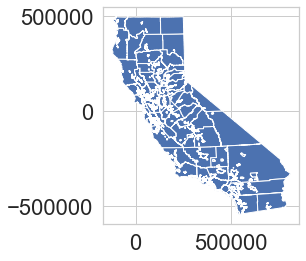

In [200]:
pop_rural_urban_dist.plot()

In [201]:
# save it as geojson file and also as csv to share
crs = {'init': 'epsg:7131'}
gdf = gpd.GeoDataFrame(pop_rural_urban_dist, crs=crs, geometry = 'geometry')
gdf.to_file("Caltrans_dist_county_rural_urban_pop.json", driver="GeoJSON")

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [202]:
pop_rural_urban_dist_excel=pop_rural_urban_dist.drop(['geometry'],axis=1)

In [203]:
pop_rural_urban_dist_excel.to_csv('Caltrans_dist_county_rural_urban_pop.csv')

# end of the scrip